In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(10)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

In [41]:
import pandas as pd

# Training and visualization

In [200]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

<Figure size 576x288 with 0 Axes>

Text(1.4, 1.0, 'Depth=0')

Text(3.2, 1.8, 'Depth=1')

Text(4.05, 0.5, '(Depth=2)')

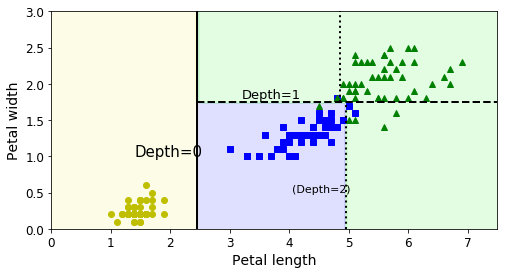

In [201]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Predicting classes and probabilities

In [202]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [203]:
tree_clf.predict_proba([[2.5, 2]])

array([[0.        , 0.33333333, 0.66666667]])

In [204]:
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)

In [205]:
X_new = np.c_[x1.ravel(), x2.ravel()]

In [206]:
proba = tree_clf.predict_proba(X_new)

In [207]:
proba.shape

(10000, 3)

In [208]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.figure_factory as ff

import plotly.graph_objs as go
import plotly.plotly as py

In [209]:
columns = ["petal_length","petal_width"]
proba_matrix0=pd.DataFrame(X_new,columns=columns)
proba_matrix0["probability"]=tree_clf.predict_proba(X_new)[:,0]
proba_matrix0_p=proba_matrix0.pivot(index="petal_length", columns="petal_width",values="probability")


In [210]:
proba_matrix1=pd.DataFrame(X_new,columns=columns)
proba_matrix1["probability"]=tree_clf.predict_proba(X_new)[:,1]
proba_matrix1_p=proba_matrix1.pivot(index="petal_length", columns="petal_width",values="probability")


In [211]:
proba_matrix2=pd.DataFrame(X_new,columns=columns)
proba_matrix2["probability"]=tree_clf.predict_proba(X_new)[:,2]
proba_matrix2_p=proba_matrix2.pivot(index="petal_length", columns="petal_width",values="probability")


In [212]:
color0=np.ones([100,100])*100000
color1=np.ones([100,100])*200
color2=np.ones([100,100])*3

In [215]:
trace0=go.Surface(
        x=proba_matrix0_p.index,
        y=proba_matrix0_p.columns,
        z=proba_matrix0_p.values,
        colorscale = [[0, 'rgb(0,0,255)'], [1,'rgb(0,0,255)']],
        showscale=False,
        opacity=1, 
        name = "Iris-Setosa"
        )

trace1=go.Surface(
        x=proba_matrix1_p.index,
        y=proba_matrix1_p.columns,
        z=proba_matrix1_p.values,
        colorscale = [[0, 'rgb(0,255,0)'], [1,'rgb(0,255,0)']],
        showscale=False,
        opacity=1,
        name = "Iris-Versicolor"
        )

trace2=go.Surface(
        x=proba_matrix2_p.index,
        y=proba_matrix2_p.columns,
        z=proba_matrix2_p.values,
        colorscale = [[0, 'rgb(255,0,0)'], [1,'rgb(255,0,0)']],
        showscale=False,
        opacity=1,
        name = "Iris-Virginica"
        )

data=[trace0, trace1, trace2]

figure=go.Figure(
    data=data,
    layout=go.Layout(
        scene=dict(
            xaxis=dict(title="Petal length"),
            yaxis=dict(title="Petal width"),
            zaxis=dict(title="Probability of iris class")
           
                  ),
         title="Analysis of Decision Tree boundaries"
    ))
iplot(figure)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

<Figure size 792x288 with 0 Axes>

Text(0.5, 1.0, 'No restrictions')

Text(0.5, 1.0, 'min_samples_leaf = 4')

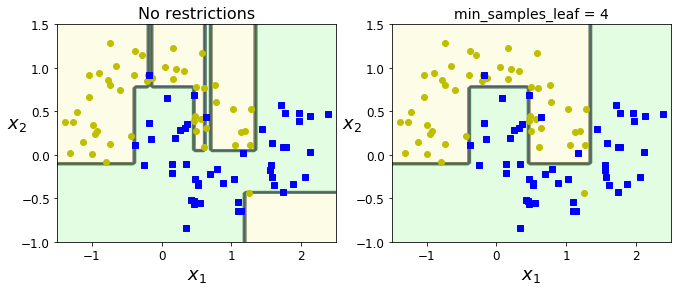

In [219]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

<Figure size 792x288 with 0 Axes>

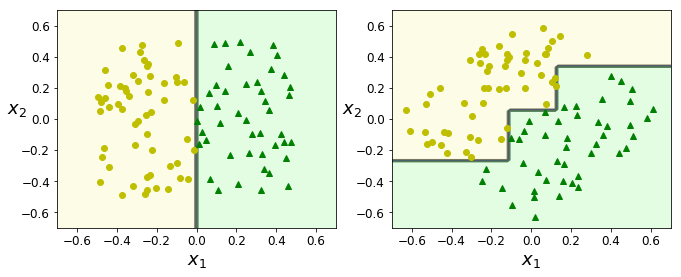

In [220]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

Decision Trees are sensitive to data rotation (only linear decision boundaries)